In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# ✅ Skip the first 23 lines so the real header starts at 'date,ind,rain,...'
df = pd.read_csv(
    url,
    skiprows=23,       # THIS is the crucial change
    encoding="latin1"
)

print(df.columns)
df.head()

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


/var/folders/vf/d31hw_f11mj9k804v5_7zl3h0000gn/T/ipykernel_32887/3403771918.py:7: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [2]:
# 1. Convert 'date' to datetime and use it as index
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df = df.set_index('date')

# 2. Make 'temp' and 'wdsp' numeric
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Quick check
df[['temp', 'wdsp']].head()

/var/folders/vf/d31hw_f11mj9k804v5_7zl3h0000gn/T/ipykernel_32887/87881871.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')


,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0
1996-07-31 09:00:00,11.6,0.0
1996-07-31 10:00:00,12.9,0.0
1996-07-31 11:00:00,14.5,0.0


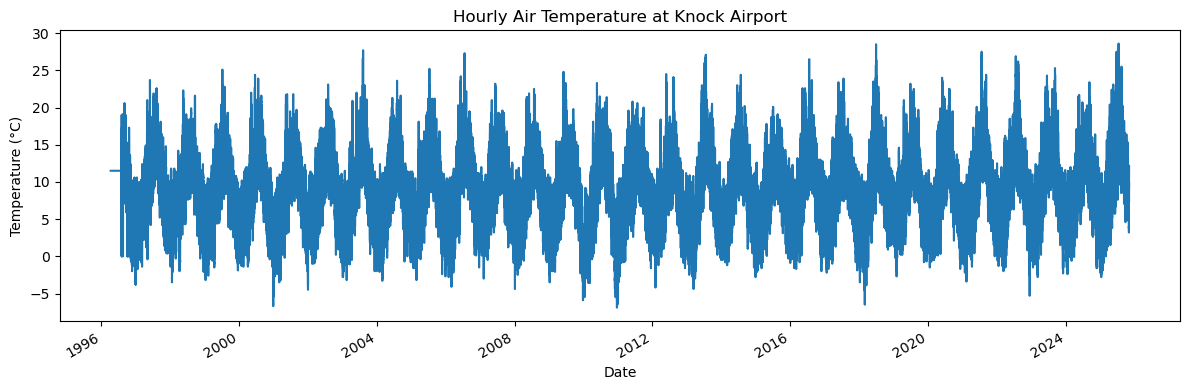

In [3]:
plt.figure(figsize=(12, 4))
df['temp'].plot()

plt.title("Hourly Air Temperature at Knock Airport")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()